# Training baseline architecture (x-vectors 2018)

**Imports:**

In [1]:
import torch
import matplotlib.pyplot as plt 
from os import listdir
from pathlib import Path
from sklearn.manifold import TSNE
from src.nn_models.xvectors_baseline import *

**Configuration:**

In [2]:
# training configuration
training_data = Path("data/vox1_dev/")
testing_data = Path("data/vox1_test/")
model_params = Path("model_params.pt")
device = 'cuda' if torch.cuda.is_available() else 'cpu'
val_proportion = 0.15
chunk_size = 24
epochs = 30
batch_size = 2048
mb_in_run = 10

# model declaration:
speakers_count = len(listdir(training_data))
model = XVectorsBaseline(speakers_count, chunk_size).to(device)

if model_params.is_file():
    model.load_state_dict(torch.load(model_params))
    print("Model parameters were loaded!")

# loss and optimizer selection:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# create training and validation dataset and dataloader:
dataset = create_training_mfcc_dataset(training_data, chunk_size)
val_count = int(val_proportion * len(dataset))
train_count = len(dataset) - val_count
train_dataset, val_dataset = random_split(dataset, [train_count, val_count])
train_dataloader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=True)

**Training model:**

In [3]:
train_model(model, model_params, epochs, mb_in_run, train_dataloader, val_dataloader, optimizer, criterion, device)

Initial accuracy on validation set: 11.838%

START OF EPOCH: 1/30
epoch: 1/30, run: 1/2, processed m.b.: 10, avg.m.b. loss:  3.299, accuracy: 19.244%, duration: 27.46s
Accuracy on validation set has been increased by 7.406%. Model parameters were resaved!
epoch: 1/30, run: 2/2, processed m.b.: 10, avg.m.b. loss:  2.732, accuracy: 19.244%, duration: 27.273s
END OF EPOCH: 1/30, DURATION: 59.789s, AVG.M.B. LOSS: 3.016

START OF EPOCH: 2/30
epoch: 2/30, run: 1/2, processed m.b.: 10, avg.m.b. loss:  2.739, accuracy: 19.244%, duration: 26.972s
epoch: 2/30, run: 2/2, processed m.b.: 10, avg.m.b. loss:  2.719, accuracy: 19.244%, duration: 26.915s
END OF EPOCH: 2/30, DURATION: 58.777s, AVG.M.B. LOSS: 2.729

START OF EPOCH: 3/30
epoch: 3/30, run: 1/2, processed m.b.: 10, avg.m.b. loss:  2.717, accuracy: 19.244%, duration: 27.139s
epoch: 3/30, run: 2/2, processed m.b.: 10, avg.m.b. loss:  2.691, accuracy: 19.244%, duration: 27.022s
END OF EPOCH: 3/30, DURATION: 59.055s, AVG.M.B. LOSS: 2.704

STAR

epoch: 22/30, run: 2/2, processed m.b.: 10, avg.m.b. loss:  1.484, accuracy: 36.524%, duration: 26.698s
END OF EPOCH: 22/30, DURATION: 58.575s, AVG.M.B. LOSS: 1.499

START OF EPOCH: 23/30
epoch: 23/30, run: 1/2, processed m.b.: 10, avg.m.b. loss:  1.452, accuracy: 38.025%, duration: 27.051s
epoch: 23/30, run: 2/2, processed m.b.: 10, avg.m.b. loss:  1.45, accuracy: 38.4%, duration: 26.673s
END OF EPOCH: 23/30, DURATION: 58.635s, AVG.M.B. LOSS: 1.451

START OF EPOCH: 24/30
epoch: 24/30, run: 1/2, processed m.b.: 10, avg.m.b. loss:  1.372, accuracy: 39.209%, duration: 26.881s
Accuracy on validation set has been increased by 0.621%. Model parameters were resaved!
epoch: 24/30, run: 2/2, processed m.b.: 10, avg.m.b. loss:  1.364, accuracy: 38.444%, duration: 26.668s
END OF EPOCH: 24/30, DURATION: 58.559s, AVG.M.B. LOSS: 1.368

START OF EPOCH: 25/30
epoch: 25/30, run: 1/2, processed m.b.: 10, avg.m.b. loss:  1.333, accuracy: 38.271%, duration: 26.851s
epoch: 25/30, run: 2/2, processed m.b.:

**Visual evaluation of model on testing data:**

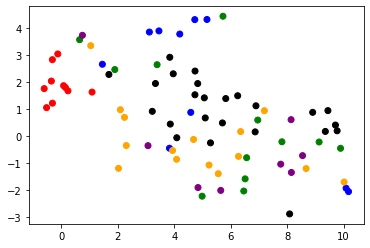

In [4]:
xvectors, labels = get_session_xvectors(model, testing_data, chunk_size, batch_size, device)
xvectors_reduced = TSNE(n_components=2).fit_transform(np.array(xvectors))
colors = ["red", "blue", "green", "orange", "black", "purple"]
plt.scatter(xvectors_reduced[:,0], xvectors_reduced[:,1], c=[colors[l] for l in labels])